In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Read csv data file
# Data without feature standardization
df = pd.read_csv('data/titanic_unscaled.csv')

In [3]:
# View the number of rows and columns
df.shape

(887, 7)

In [4]:
# View the last 5 rows
df.tail()

,survived,pclass,sex,age,sibspouse,parchild,fare
882,0,2,1,27.0,0,0,13.00
883,1,1,0,19.0,0,0,30.00
884,0,3,0,7.0,1,2,23.45
885,1,1,1,26.0,0,0,30.00
886,0,3,1,32.0,0,0,7.75


In [5]:
df.dtypes

survived       int64
pclass         int64
sex            int64
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [6]:
# Convert integer to string: survived
df['survived'] = df['survived'].astype(str)

# Convert integer to string: pclass
df['pclass'] = df['pclass'].astype(str)

# Convert integer to string: sex
df['sex'] = df['sex'].astype(str)

df.dtypes

survived      object
pclass        object
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [7]:
# Indicate the target column
target = df['survived']

# Indicate the columns that will serve as features
features = df.drop('survived', axis = 1)

In [8]:
# Split data into train, validation and test sets

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training + development set and test set
x, x_test, y, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)
                                        
# Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [9]:
# Training a decision tree model

# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with default parameters
dtree = DecisionTreeClassifier()

# Train the model using the training set
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
# Predict the target for the development dataset
dev_predict = dtree.predict(x_dev)

dev_predict

array(['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1'],
      dtype=object)

In [11]:
# Evaluate the decision tree model on development set

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.8309859154929577


In [12]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_dev, dev_predict))

# Print precision, recall and F1
print(classification_report(y_dev, dev_predict))

[[74 11]
 [13 44]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        85
           1       0.80      0.77      0.79        57

    accuracy                           0.83       142
   macro avg       0.83      0.82      0.82       142
weighted avg       0.83      0.83      0.83       142



In [13]:
# Create a decision tree classifier with criterion = entropy and max_depth = 3
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Train the model using the training set
dtree.fit(x_train, y_train)

# Predict the target for the development dataset
dev_predict = dtree.predict(x_dev)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.8169014084507042


In [15]:
!conda list

# packages in environment at C:\Users\Chris\anaconda3\envs\tensorflow:
#
# Name                    Version                   Build  Channel
_tflow_select             2.3.0                       mkl  
absl-py                   1.3.0            py39haa95532_0  
aiohttp                   3.8.3            py39h2bbff1b_0  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.3            py39haa95532_1  
astroid                   2.14.2           py39haa95532_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
astunparse                1.6.3                      py_0  
async-timeout             4.0.2            py39haa95532_0  
atomicwrites        

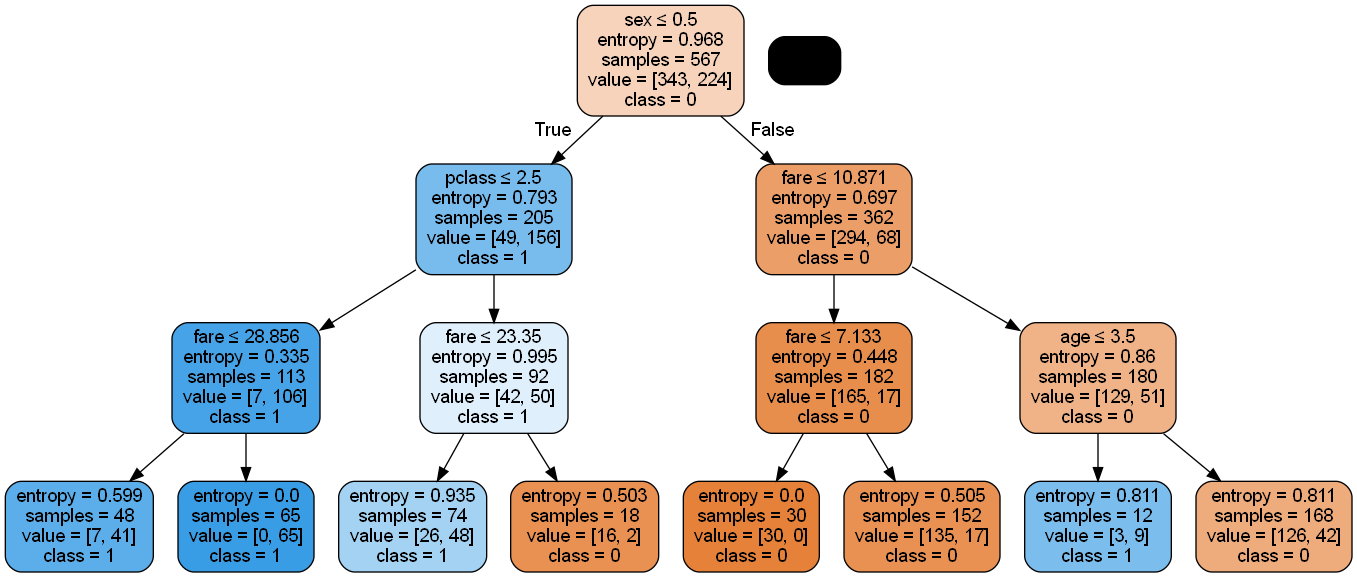

In [18]:
# Load required libraries
import six
import sys
sys.modules['sklearn.externals.six'] = six

import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

# Visualize decision tree
dot_data = StringIO()

tree.export_graphviz(dtree,
    out_file = dot_data,
    class_names = ['0', '1'], # name of each of the target classes in asce
    feature_names = features.columns, # the feature names.
    filled = True, # whether to fill in the boxes with colors.
    rounded = True, # whether to round the corners of the boxes.
    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
# Load export_text library
from sklearn.tree import export_text

tree_rules = export_text(dtree, feature_names=list(x_train))

# Print deccision tree rules
print(tree_rules)

|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 23.35
|   |   |   |--- class: 1
|   |   |--- fare >  23.35
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- fare <= 10.87
|   |   |--- fare <= 7.13
|   |   |   |--- class: 0
|   |   |--- fare >  7.13
|   |   |   |--- class: 0
|   |--- fare >  10.87
|   |   |--- age <= 3.50
|   |   |   |--- class: 1
|   |   |--- age >  3.50
|   |   |   |--- class: 0

